In [24]:
import pandas as pd
titanic=pd.read_csv('titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
titanic['Age']=titanic['Age'].fillna(titanic['Age'].median())
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [26]:
print(titanic.Sex.unique())
titanic.loc[titanic.Sex=='male','Sex']=0
titanic.loc[titanic.Sex=='female','Sex']=1

['male' 'female']


In [27]:
print(titanic.Embarked.unique())
titanic.Embarked=titanic.Embarked.fillna('S')
titanic.loc[titanic.Embarked=='S','Embarked']=0
titanic.loc[titanic.Embarked=='C','Embarked']=1
titanic.loc[titanic.Embarked=='Q','Embarked']=2

['S' 'C' 'Q' nan]


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold
predictors=['Pclass','Sex','Age','SibSp','Parch','Fare', 'Embarked']
alg=LinearRegression()
kf=KFold(len(titanic),3,random_state=1)
predictions=[]
for train_k,test_k in kf:
#     train_predictors = titanic[predictors].iloc[train_k]
#     train_target = titanic["Survived"].iloc[train_k]
#     alg.fit(train_predictors, train_target)
#     test_predictions = alg.predict(titanic[predictors].iloc[test_k,:])
#     predictions.append(test_predictions)
    train=titanic.iloc[train_k]
    test=titanic.iloc[test_k]
    train_x=train[predictors]
    train_y=train['Survived']
    alg.fit(train_x,train_y)
    test_predictions=alg.predict(test[predictors])
    predictions.append(test_predictions)


In [29]:
import numpy as np
predictions=np.concatenate(predictions,axis=0)
# print(predictions)
predictions[predictions>0.7]=1
predictions[predictions<=0.7]=0
accuracy=sum(predictions[predictions==titanic['Survived']])/len(predictions)
print(accuracy)

0.17845117845117844


In [30]:
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
scores=cross_val_score(lr,titanic[predictors],titanic['Survived'],cv=3)
print(scores.mean())

0.7878787878787877


In [31]:
titanic_test=pd.read_csv('test.csv')
titanic_test["Age"] = titanic_test["Age"].fillna(titanic["Age"].median())
titanic_test["Fare"] = titanic_test["Fare"].fillna(titanic_test["Fare"].median())
titanic_test.loc[titanic_test["Sex"] == "male", "Sex"] = 0 
titanic_test.loc[titanic_test["Sex"] == "female", "Sex"] = 1
titanic_test["Embarked"] = titanic_test["Embarked"].fillna("S")

titanic_test.loc[titanic_test["Embarked"] == "S", "Embarked"] = 0
titanic_test.loc[titanic_test["Embarked"] == "C", "Embarked"] = 1
titanic_test.loc[titanic_test["Embarked"] == "Q", "Embarked"] = 2

In [32]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
alg=RandomForestClassifier(random_state=1,n_estimators=10,min_samples_split=2,min_samples_leaf=1)
kf=KFold(len(titanic),3,random_state=1)
scores=cross_val_score(alg,titanic[predictors],titanic['Survived'],cv=kf)
print(scores.mean())

0.7856341189674523


In [33]:
alg = RandomForestClassifier(random_state=1, n_estimators=100, min_samples_split=4, min_samples_leaf=2)
kf = cross_validation.KFold(titanic.shape[0], 3, random_state=1)
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=kf)
print(scores.mean())

0.8148148148148148


In [34]:
titanic['FamilySize']=titanic['SibSp']+titanic['Parch']
titanic['NameLength']=titanic.Name.apply(lambda x:len(x))

In [35]:
import re 
def get_name(name):
    title_search=re.search(r'([A-Za-z]+)\.',name)
    if title_search:
        return title_search.group(1)
titles=titanic.Name.apply(get_name)
print(pd.value_counts(titles))
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
for k,v in title_mapping.items():
    titles[titles==k]=v
print(pd.value_counts(titles))
titanic['Titles']=titles

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Don           1
Sir           1
Capt          1
Ms            1
Jonkheer      1
Lady          1
Countess      1
Mme           1
Name: Name, dtype: int64
1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64


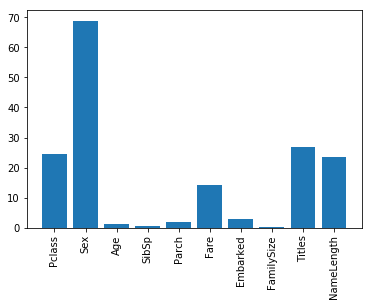

In [36]:
import numpy as np 
from sklearn.feature_selection import SelectKBest,f_classif
import  matplotlib.pyplot as plt
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "Titles", "NameLength"]
selector=SelectKBest(f_classif,k=5)
selector.fit(titanic[predictors], titanic["Survived"])

scores=-np.log10(selector.pvalues_)
plt.bar(range(len(predictors)),scores)
plt.xticks(range(len(predictors)),predictors,rotation='vertical')
plt.show()

In [37]:
predictors = ["Pclass", "Sex", "Fare", "Title"]
alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=8, min_samples_leaf=4)

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
algorithms=[
    [GradientBoostingClassifier(random_state=1,n_estimators=25,max_depth=3),["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Titles"]],
    [LogisticRegression(random_state=1),["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Titles"]]
]
kf=KFold(titanic.shape[0],n_folds=3,random_state=1)
predictions=[]
for train,test in kf:
    train_y=titanic['Survived'].iloc[train]
    full_test_predictions = []
    for alg,predictors in algorithms:
        train_x=titanic[predictors].iloc[train]
        test_x=titanic[predictors].iloc[test]
        alg.fit(train_x,train_y)
        test_predictions=alg.predict_proba(test_x.astype(float))[:,1]
        full_test_predictions.append(test_predictions)
        
#     print(full_test_predictions)
#     print(full_test_predictions[0])
    test_predictions=(full_test_predictions[0]+full_test_predictions[1])/2
    test_predictions[test_predictions<=.5]=0
    test_predictions[test_predictions>.5]=1
    predictions.append(test_predictions)
pred=np.concatenate(predictions,axis=0)
accuracy=sum(pred[pred==titanic['Survived']])/len(pred)
print(accuracy)

0.27946127946127947


[1, 2]
